# Introdution

Peer-to-peer lending is disrupting the banking industry since it directly connects borrowers and potential lenders/investors. The LendingClub specializes in small personal finance loans. In this notebook, you will build a classification model based on data from the LendingClub website. The main use of classification models is to score the likelihood of an event occuring. For loan data, the model will be used to predict whether a loan will be paid off in full or the loan needs to be charged off and possibly go into default. You can use the model to score the quality of current loans and identify the ones most likely to default.

## Goal

To predict if a company/loan borrower will default on their loan

In [1]:
import numpy as np       # For vectorised operations and handling NaN values
import pandas as pd      # For storing, accessing and manipulating the data
from sklearn.preprocessing import LabelBinarizer       # For one hot encoding
import matplotlib.pyplot as plt       # For plots
import seaborn as sns    # For advanced plotting
from statsmodels.stats.outliers_influence import variance_inflation_factor       # For VIF
from sklearn.preprocessing import StandardScaler      # For standardisation
from imblearn.over_sampling import SMOTE       # For Synthetic Minority Over-sampling Technique
%matplotlib inline

# Model imports

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics import

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report      # For precision, recall, f1-score, support

# Metrics with plots

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

## Import data

In [2]:
data = pd.read_csv('XYZCorp_LendingData.txt', sep = '\t', encoding = 'ISO-8859-1')

C:\Users\sragh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## View Data

In [3]:
# Transposing as there are many columns and fewer rows to display
data.head().transpose()

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
...,...,...,...,...,...
total_rev_hi_lim,NaN,NaN,NaN,NaN,NaN
inq_fi,NaN,NaN,NaN,NaN,NaN
total_cu_tl,NaN,NaN,NaN,NaN,NaN
inq_last_12m,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(855969, 73)

In [5]:
# Display all rows
pd.set_option('display.max_rows', 73)
pd.set_option('display.width', 1000)

In [6]:
data.head().transpose()

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65,15.27,15.96,13.49,12.69
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [7]:
# Data types of Columns
data.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

## Understanding Data

The below columns will be used for factorising and one-hot coding respectively.

In [8]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
data['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

## Checking Null Values

In [10]:
data.isna().sum().sort_values(ascending = False)

dti_joint                      855529
verification_status_joint      855527
annual_inc_joint               855527
il_util                        844360
mths_since_rcnt_il             843035
total_bal_il                   842681
inq_last_12m                   842681
open_acc_6m                    842681
open_il_6m                     842681
open_il_24m                    842681
open_il_12m                    842681
open_rv_12m                    842681
open_rv_24m                    842681
max_bal_bc                     842681
all_util                       842681
inq_fi                         842681
total_cu_tl                    842681
desc                           734157
mths_since_last_record         724785
mths_since_last_major_derog    642830
mths_since_last_delinq         439812
next_pymnt_d                   252971
tot_cur_bal                     67313
tot_coll_amt                    67313
total_rev_hi_lim                67313
emp_title                       49443
emp_length  

In [11]:
# Getting column names
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'm

### Setting Index

In [12]:
data['id'].nunique()

855969

In [13]:
data['member_id'].nunique()

855969

Since, member_id indicates that the customer has been given a loan setting it as index and dropping id

In [14]:
data.set_index('member_id',inplace = True)
data[:3].head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1314167,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1313524,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
data.drop('id', inplace = True, axis = 1)

In [16]:
# Checking dimensions
data.shape

(855969, 71)

### Getting Summary - To fill Null values according to Mean or Median or Mode

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,855969.0,14745.571335,8425.340005,500.00,8000.0000,13000.000,20000.000000,3.500000e+04
funded_amnt,855969.0,14732.378305,8419.471653,500.00,8000.0000,13000.000,20000.000000,3.500000e+04
funded_amnt_inv,855969.0,14700.061226,8425.805478,0.00,8000.0000,13000.000,20000.000000,3.500000e+04
int_rate,855969.0,13.192320,4.368365,5.32,9.9900,12.990,15.990000,2.899000e+01
installment,855969.0,436.238072,243.726876,15.69,260.5500,382.550,571.560000,1.445460e+03
annual_inc,855969.0,75071.185963,64264.469813,0.00,45000.0000,65000.000,90000.000000,9.500000e+06
dti,855969.0,18.122165,17.423629,0.00,11.8800,17.610,23.900000,9.999000e+03
delinq_2yrs,855969.0,0.311621,0.857189,0.00,0.0000,0.000,0.000000,3.900000e+01
inq_last_6mths,855969.0,0.680915,0.964033,0.00,0.0000,0.000,1.000000,8.000000e+00
mths_since_last_delinq,416157.0,34.149943,21.868500,0.00,15.0000,31.000,50.000000,1.880000e+02


In [18]:
def fill_missing(col, meth = 'mean'):
    '''
    col: The column name of the dataframe to impute the missing values
    meth: Method via which the values must be imputed. eg., mean, median, valid, mode, etc. Default is mean()
    
    PS.
    date in meth imputes the missing via the first occured date in the col
    '''
    if meth == 'median':
        data[col].fillna(data[col].median(), inplace = True)
    elif meth == 'valid':
        data[col].fillna(data.loc[data[col].first_valid_index()][col], inplace = True)
    elif meth == 'mode':
        data[col].fillna(data[col].mode(), inplace = True)
    else:
        data[col].fillna(data[col].mean(), inplace = True)

In [19]:
col_name = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
for i in col_name:
    fill_missing(i, 'mean')

In [20]:
data['mths_since_last_delinq'].isna().sum()

0

In [21]:
data['mths_since_last_record'].isna().sum()

0

In [22]:
data['mths_since_last_major_derog'].isna().sum()

0

In [23]:
# Since dtu_join is Null only where the Loan/Application Type is individual, filling it with constant
data['dti_joint'].fillna(0, inplace = True)

In [24]:
data['dti_joint'].isna().sum()

0

In [25]:
data.shape

(855969, 71)

In [26]:
# Removing all columns (unnecessary one's) where the null values are more than 30% of the values
data.drop(data.columns[data.isna().sum() == 842681].tolist(), axis = 1, inplace = True)

In [27]:
data.shape

(855969, 59)

In [28]:
data.isna().sum().sort_values(ascending = False)

verification_status_joint      855527
annual_inc_joint               855527
il_util                        844360
mths_since_rcnt_il             843035
desc                           734157
next_pymnt_d                   252971
tot_cur_bal                     67313
tot_coll_amt                    67313
total_rev_hi_lim                67313
emp_title                       49443
emp_length                      43061
last_pymnt_d                     8862
revol_util                        446
collections_12_mths_ex_med         56
last_credit_pull_d                 50
title                              33
delinq_2yrs                         0
dti                                 0
addr_state                          0
zip_code                            0
funded_amnt                         0
purpose                             0
funded_amnt_inv                     0
pymnt_plan                          0
issue_d                             0
verification_status                 0
annual_inc  

In [29]:
data.drop(['mths_since_rcnt_il'], inplace = True, axis = 1)
data.shape

(855969, 58)

In [30]:
# Finding the count in each class
data.groupby('il_util').agg(np.size).transpose()

il_util,0.0,0.5,0.7,1.1,1.2,1.8,1.9,2.1,2.4,2.7,...,151.3,152.2,152.6,154.7,155.7,158.5,170.6,176.3,179.2,223.3
loan_amnt,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
funded_amnt,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
funded_amnt_inv,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
term,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
int_rate,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
installment,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
grade,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sub_grade,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
emp_title,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
emp_length,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
data['il_util'].describe()

count    11609.000000
mean        71.486993
std         23.015293
min          0.000000
25%         58.500000
50%         75.000000
75%         87.500000
max        223.300000
Name: il_util, dtype: float64

In [32]:
# Simply exploring with Median
fill_missing('il_util', 'median')

In [33]:
data['il_util'].isna().sum()

0

### Converting Categorical into Factor

In [34]:
# default_ind column is treated as numeric data with 2 values, converting it into Factor (level - 0, 1)
data['default_ind'] = pd.factorize(data['default_ind'])[0]

In [35]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'annual_inc_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

In [36]:
data.iloc[0, data.columns.get_loc('next_pymnt_d')]

nan

In [37]:
cols = ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

for i in cols:
    data[i] = pd.to_datetime(data[i])
    data[i] = data[i].fillna(data.iloc[0, data.columns.get_loc(i)])

In [38]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'next_pymnt_d', 'collections_12_mths_ex_med', 'annual_inc_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

In [39]:
data.loc[data['next_pymnt_d'].first_valid_index()]['next_pymnt_d']

Timestamp('2016-02-01 00:00:00')

In [40]:
col_name = ['verification_status_joint', 'next_pymnt_d']
for i in col_name:
    fill_missing(i, 'valid')

In [41]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'collections_12_mths_ex_med', 'annual_inc_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

In [42]:
data[data.columns[data.isna().any()]].head()

,emp_title,emp_length,desc,title,revol_util,collections_12_mths_ex_med,annual_inc_joint,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,,,,,,,,,,
1296599,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,83.7,0.0,NaN,NaN,NaN,NaN
1314167,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,9.4,0.0,NaN,NaN,NaN,NaN
1313524,NaN,10+ years,NaN,real estate business,98.5,0.0,NaN,NaN,NaN,NaN
1277178,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,21.0,0.0,NaN,NaN,NaN,NaN
1311748,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,53.9,0.0,NaN,NaN,NaN,NaN


In [43]:
cols = ['revol_util', 'collections_12_mths_ex_med', 'annual_inc_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for i in cols:
    fill_missing(i, 'mean')

In [44]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title'], dtype='object')

In [45]:
fill_missing('verification_status_joint', 'mode')

In [46]:
data.isna().sum().sort_values(ascending = False)

desc                           734157
emp_title                       49443
emp_length                      43061
title                              33
default_ind                         0
open_acc                            0
mths_since_last_record              0
mths_since_last_delinq              0
inq_last_6mths                      0
earliest_cr_line                    0
delinq_2yrs                         0
dti                                 0
addr_state                          0
zip_code                            0
purpose                             0
issue_d                             0
pymnt_plan                          0
total_rev_hi_lim                    0
verification_status                 0
annual_inc                          0
home_ownership                      0
sub_grade                           0
grade                               0
installment                         0
int_rate                            0
term                                0
funded_amnt_

## Write Cleansed Data as CSV

Used by Tableau

In [47]:
# data.to_csv('Cleansed Data.csv')

## Dropping Un-necessary Columns

In [48]:
data.drop(['zip_code', 'addr_state', 'desc', 'title', 'earliest_cr_line', 
           'emp_title', 'sub_grade', 'policy_code', 'purpose'], axis = 1, inplace = True)

In [49]:
len(data.columns)

49

In [50]:
data.isna().sum().sort_values(ascending = False)

emp_length                     43061
default_ind                        0
pymnt_plan                         0
revol_util                         0
revol_bal                          0
pub_rec                            0
open_acc                           0
mths_since_last_record             0
mths_since_last_delinq             0
inq_last_6mths                     0
delinq_2yrs                        0
dti                                0
issue_d                            0
initial_list_status                0
verification_status                0
annual_inc                         0
home_ownership                     0
grade                              0
installment                        0
int_rate                           0
term                               0
funded_amnt_inv                    0
funded_amnt                        0
total_acc                          0
out_prncp                          0
total_rev_hi_lim                   0
out_prncp_inv                      0
i

## Feature Engineering

In [51]:
data['emp_length'].head()

member_id
1296599    10+ years
1314167     < 1 year
1313524    10+ years
1277178    10+ years
1311748       1 year
Name: emp_length, dtype: object

In [52]:
data['emp_length'].dtypes

dtype('O')

In [53]:
# Cleaning Employee Length Info
data['emp_length'].replace(regex = True, inplace = True, to_replace = r'10\+', value = r'10')
data['emp_length'].replace(regex = True, inplace = True, to_replace = r'year', value = r'')
data['emp_length'].replace(regex = True, inplace = True, to_replace = r' s', value = r'')
data['emp_length'].replace(regex = True, inplace = True, to_replace = r'< 1', value = r'0')

# Eliminating the spaces between the number and the word 'year'
data['emp_length'].replace(regex = True, inplace = True, to_replace = r' ', value = r'')

# Treating 'nan' as Null values
data['emp_length'].replace(regex = True, inplace = True, to_replace = 'nan', value = np.nan)

data['emp_length'] = data['emp_length'].astype(str)
data['emp_length'].head()

member_id
1296599    10
1314167     0
1313524    10
1277178    10
1311748     1
Name: emp_length, dtype: object

In [54]:
# Checking for Missing values
data['emp_length'].isna().sum()

0

In [55]:
data['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 'nan'],
      dtype=object)

In [56]:
data[data['emp_length'] == 'nan']['int_rate'].mean()

13.236918557395324

In [57]:
# Checking against other Employee length's mean
for i in ['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7']:
    print('Mean', i, ': ', data[data['emp_length'] == i]['int_rate'].mean())

Mean 10 :  13.207572760466517
Mean 0 :  13.06816101306271
Mean 1 :  13.133303436332149
Mean 3 :  13.103411829297245
Mean 8 :  13.209975955305158
Mean 9 :  13.235036160420776
Mean 4 :  13.157865450309027
Mean 5 :  13.212746227607225
Mean 6 :  13.34142788206341
Mean 2 :  13.123442871055195
Mean 7 :  13.398770947134528


In [58]:
data['emp_length'].isna().sum()

0

In [59]:
# Impute using nearest meaned value
data['emp_length'].fillna('9', inplace = True)

In [60]:
data['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 'nan'],
      dtype=object)

In [61]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [62]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [63]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [64]:
data['verification_status_joint'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [65]:
data['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [66]:
data['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [67]:
cols = ['grade', 'verification_status', 'home_ownership', 'pymnt_plan', 
        'verification_status_joint', 'application_type', 'initial_list_status']

for i in cols:
    data[i] = pd.factorize(data[i])[0]

In [68]:
data['grade'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [69]:
data['home_ownership'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [70]:
data['verification_status'].unique()

array([0, 1, 2], dtype=int64)

In [71]:
data['verification_status_joint'].unique()

array([0, 1, 2], dtype=int64)

In [72]:
data['application_type'].unique()

array([0, 1], dtype=int64)

In [73]:
data['initial_list_status'].unique()

array([0, 1], dtype=int64)

### One hot coding

In [74]:
lb = LabelBinarizer()

In [75]:
# One hot coding
x = lb.fit_transform(data['emp_length'].values)

In [76]:
# Creating Dataframe based on One Hot Coding values and columns
dfOneHot = pd.DataFrame(x, columns = ["Emp_Length_"+str(int(i)) for i in range(x.shape[1])])
dfOneHot

,Emp_Length_0,Emp_Length_1,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10,Emp_Length_11
0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
855964,0,0,0,0,0,0,0,0,0,1,0,0
855965,0,0,1,0,0,0,0,0,0,0,0,0
855966,0,0,0,0,0,0,1,0,0,0,0,0
855967,0,1,0,0,0,0,0,0,0,0,0,0


In [77]:
len(data.columns)

49

In [78]:
# Pre-preparing for merging based on index
dfOneHot.set_index(data.index, inplace = True)

In [79]:
# Merged both the data
data = pd.concat([data, dfOneHot], axis = 1)
print(len(data.columns))
data.columns

61


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'il_util', 'total_rev_hi_lim', 'default_ind', 'Emp_Length_0', 'Emp_Length_1', 'Emp_Length_2', 'Emp_Length_3', 'Emp_Length_4', 'Emp_Length_5', 'Emp_Length_6', 'Emp_Length_7', 'Emp_Length_8',
       'Emp_

In [80]:
# Dropping redundant column
data.drop('emp_length', axis = 1, inplace = True)
len(data.columns)

60

In [81]:
x = lb.fit_transform(data['term'].values)

In [82]:
x.shape

(855969, 1)

In [83]:
data['term'] = x
data['term'].head()

member_id
1296599    0
1314167    1
1313524    0
1277178    0
1311748    1
Name: term, dtype: int32

In [84]:
data['term'].unique()

array([0, 1])

## EDA

In [85]:
# Displaying only mean and median to understand data (find outliers)
data.describe().transpose()[['mean', '50%']]

,mean,50%
loan_amnt,14745.571335,13000.000000
funded_amnt,14732.378305,13000.000000
funded_amnt_inv,14700.061226,13000.000000
term,0.298782,0.000000
int_rate,13.192320,12.990000
installment,436.238072,382.550000
grade,1.759513,1.000000
home_ownership,1.101646,2.000000
annual_inc,75071.185963,65000.000000
verification_status,0.973939,1.000000


In [86]:
b = data.columns[data.isna().any()].tolist()

c = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
     'annual_inc', 'revol_bal', 'out_prncp', 'out_prncp_inv', 
     'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
     'recoveries', 'last_pymnt_amnt', 'annual_inc_joint', 'tot_coll_amt', 
     'tot_cur_bal', 'total_rev_hi_lim']

for i in b:
    if i in c:
        c.remove(i)

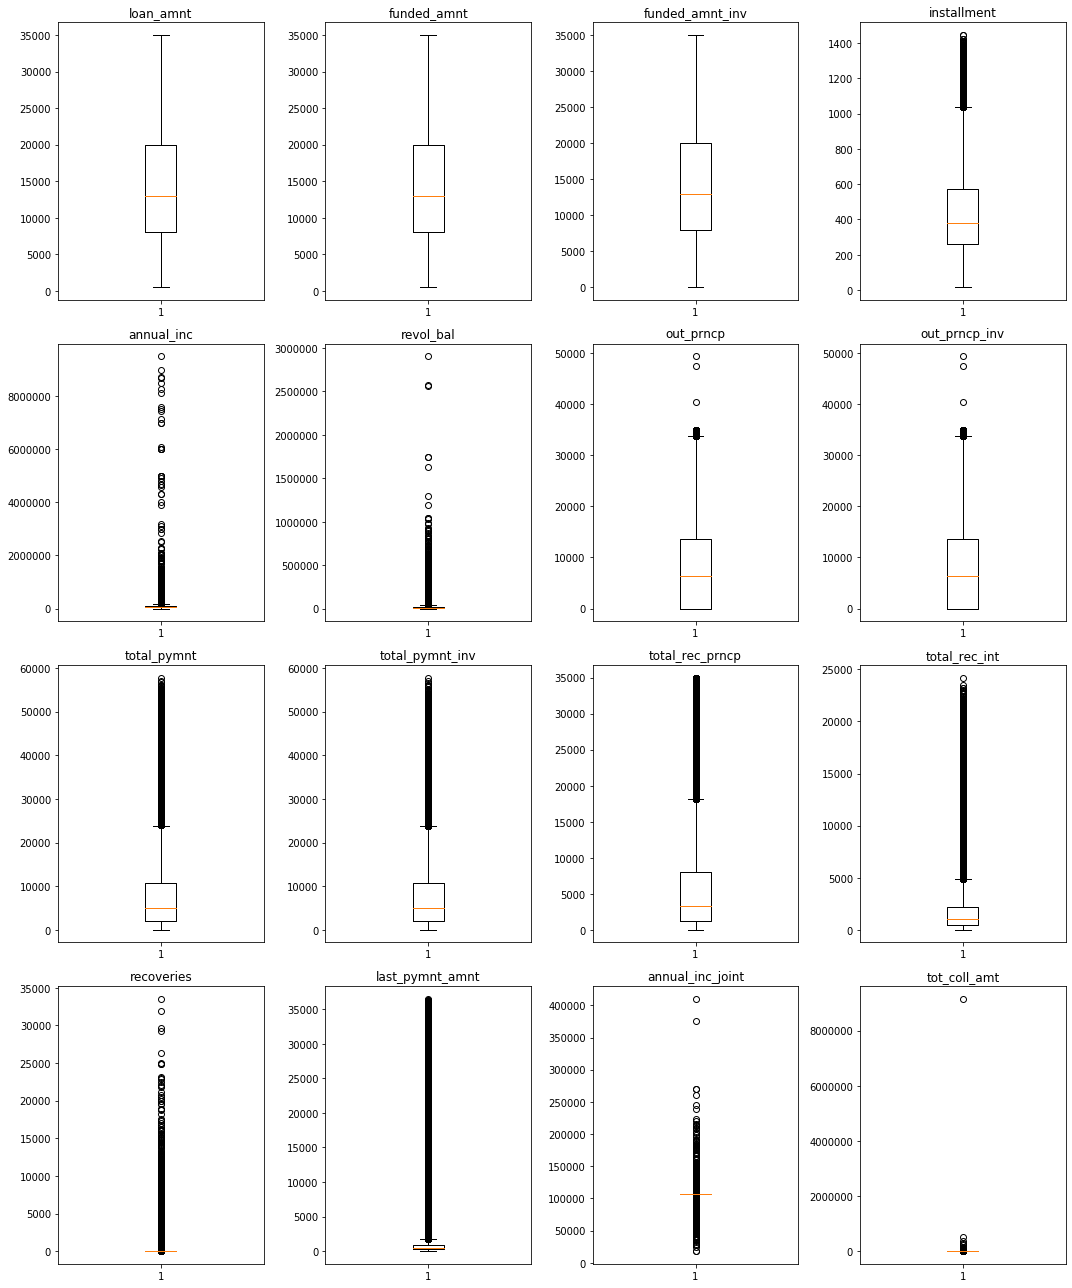

In [87]:
k = 0

fig, axes = plt.subplots(4, 4, figsize = (15, 18))
try:
    for i in range(4):
        for j in range(4):
            axes[i, j].boxplot(data[c[k]])
            axes[i,j].set_title(c[k])
            k += 1
    plt.tight_layout()
except IndexError:
    pass

In [88]:
for i in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    c.remove(i)

In [89]:
# Handling outlier's columns
for i in c:
    q3 = np.percentile(data[i], [75 ,25])[0]
    q1 = np.percentile(data[i], [75 ,25])[1]
    iqr = q3 - q1
    up_bound = q3 + 1.5 * iqr
    low_bound = q1 - 1.5 * iqr
    data.loc[data[i] > up_bound, i] = up_bound
    data.loc[data[i] < low_bound, i] = low_bound

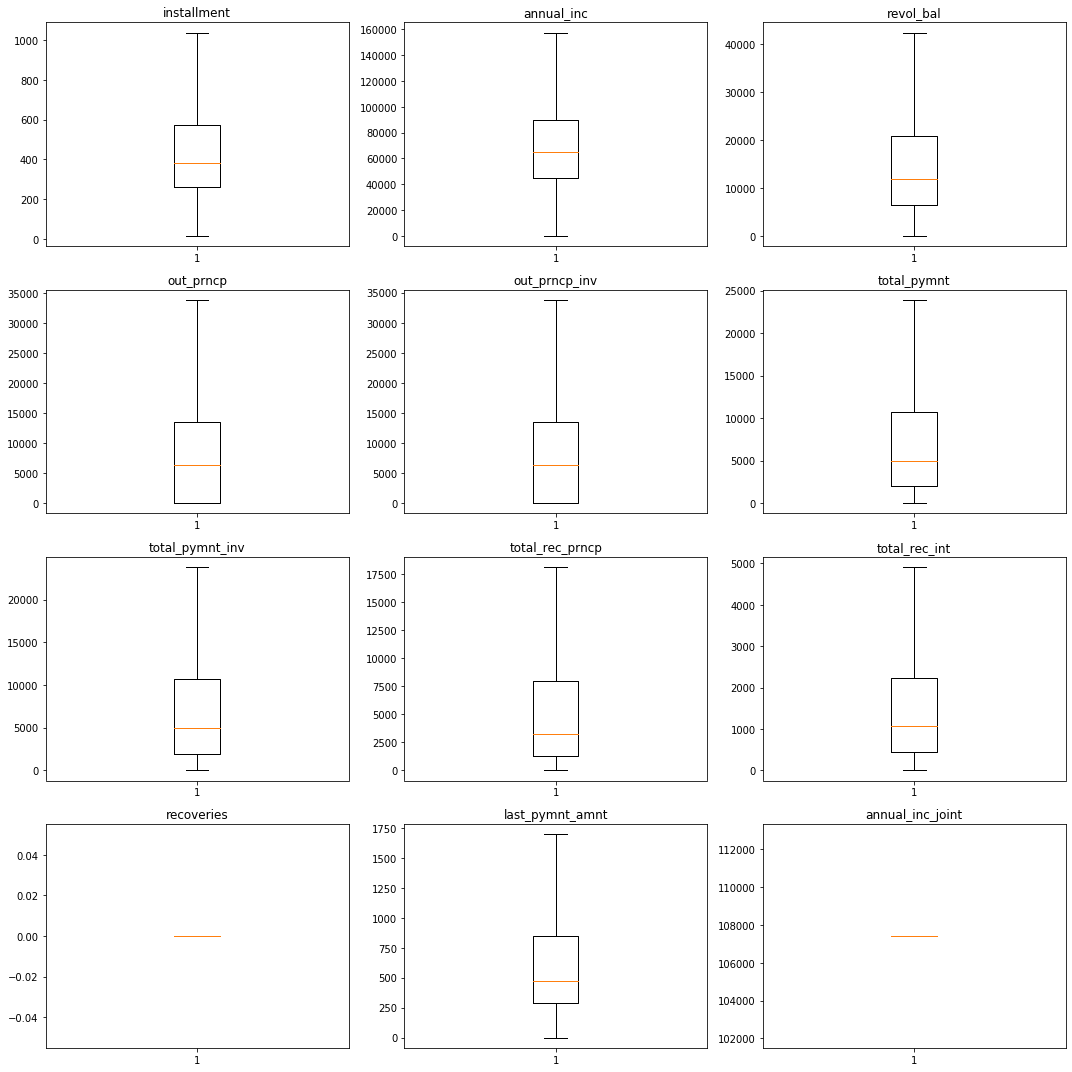

In [90]:
k = 0

fig, axes = plt.subplots(4, 3, figsize = (15, 15))
try:
    for i in range(4):
        for j in range(3):
            axes[i, j].boxplot(data[c[k]])
            axes[i,j].set_title(c[k])
            k += 1
    plt.tight_layout()
except IndexError:
    pass

__NOTE:__ For annual_inc_joint, the outliers aren't treated as it contains no Q1 and Q3.

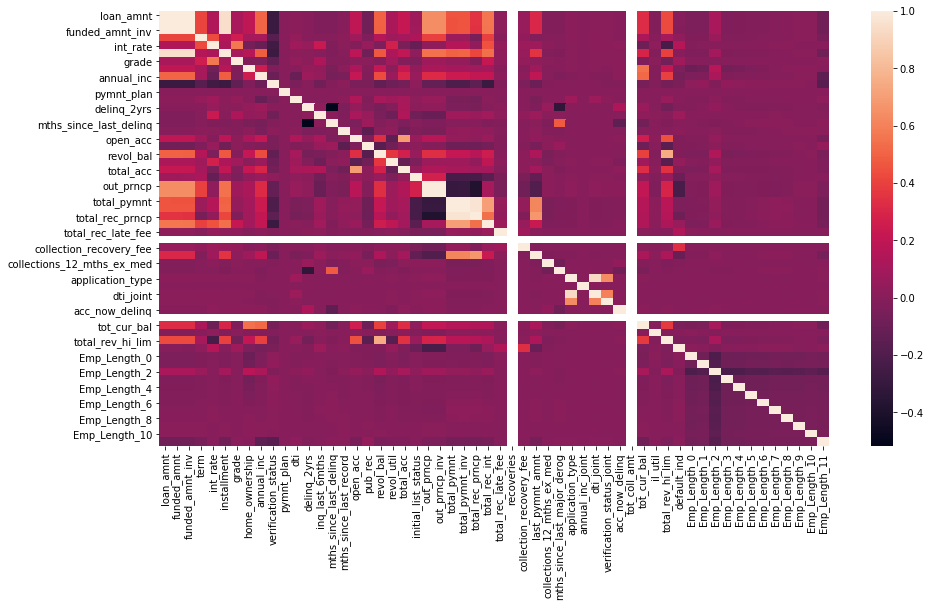

In [91]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr())

In [92]:
data.groupby('default_ind').mean().transpose()

default_ind,0,1
loan_amnt,14755.476206,14573.018486
funded_amnt,14744.071602,14528.669271
funded_amnt_inv,14716.632534,14411.372330
term,0.295341,0.358728
int_rate,13.030057,16.019092
installment,432.817888,437.510303
grade,1.726316,2.337853
home_ownership,1.109298,0.968343
annual_inc,72060.719042,63290.641673
verification_status,0.981453,0.843050


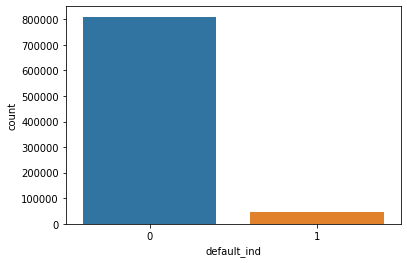

In [93]:
sns.countplot(x = 'default_ind', data = data)

### Percentage of Data distributed (Also Tableau represented)

In [94]:
print('Loan Defaulter %: ', (len(data[data['default_ind'] == 0]) / data.shape[0]) * 100)

Loan Defaulter %:  94.57141555360066


In [95]:
print('Loan Non-Defaulter %: ', (len(data[data['default_ind'] == 1]) / data.shape[0]) * 100)

Loan Non-Defaulter %:  5.428584446399344


__NOTE:__ The above percentages show that the classes are imbalanced

## Write Cleansed Data as CSV

In [96]:
# data.to_csv('Cleansed Data Final.csv')

## Seperating Dependent and Independent Variable

In [97]:
# Sorting for training and test data-set
data['issue_d'] = pd.to_datetime(data['issue_d'])
data = data.sort_values('issue_d')

In [98]:
X = data.drop('default_ind', axis = 1)
y = data.loc[:,'default_ind']

In [99]:
X.shape

(855969, 59)

In [100]:
y.shape

(855969,)

In [101]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10,Emp_Length_11
member_id,,,,,,,,,,,,,,,,,,,,,
86999,7500.0,7500.0,800.0,0,13.75,255.43,3,1,22000.0,2,...,0,0,0,0,0,0,0,0,0,0
90962,5000.0,5000.0,4150.0,0,7.43,155.38,2,2,150000.0,2,...,0,0,0,0,0,0,0,1,0,0
98991,5750.0,5750.0,3675.0,0,7.43,178.69,2,2,125000.0,2,...,1,0,0,0,0,0,0,0,0,0
112227,5000.0,5000.0,3975.0,0,7.43,155.38,2,0,40000.0,2,...,0,0,0,0,0,1,0,0,0,0
109346,1200.0,1200.0,0.0,0,11.54,39.60,1,0,20000.0,2,...,0,0,0,0,0,0,0,0,0,0


In [102]:
y.head()

member_id
86999     0
90962     0
98991     0
112227    0
109346    0
Name: default_ind, dtype: int64

## Visualization

Text(0.5, 0, 'Interest Rate (%)')

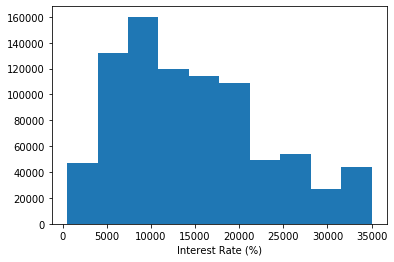

In [103]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.hist(X['loan_amnt'], histtype = 'bar')
plt.xlabel('Interest Rate (%)')

Text(0.5, 0, 'Interest Rate (%)')

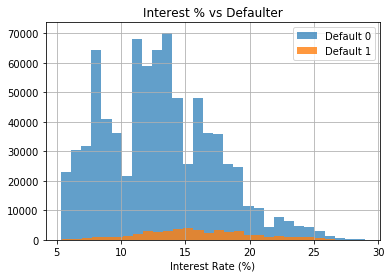

In [104]:
X[data['default_ind'] == 0]['int_rate'].hist(alpha = 0.7, label = 'Default 0', bins = 30)
X[data['default_ind'] == 1]['int_rate'].hist(alpha = 0.8, label = 'Default 1', bins = 30)
plt.legend()
plt.xlabel('Interest Rate')
plt.title('Interest % vs Defaulter')
plt.xlabel('Interest Rate (%)')

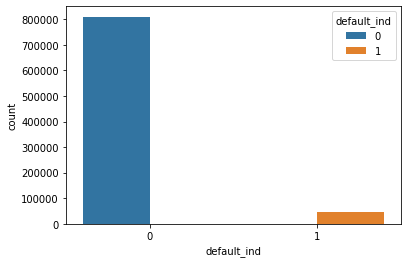

In [105]:
sns.countplot('default_ind', hue = 'default_ind', data=data)

## Splitting Data in Training and Test Data-set

In [106]:
sum(X['issue_d'] <= 'May-2015')

598978

In [107]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'il_util', 'total_rev_hi_lim', 'Emp_Length_0', 'Emp_Length_1', 'Emp_Length_2', 'Emp_Length_3', 'Emp_Length_4', 'Emp_Length_5', 'Emp_Length_6', 'Emp_Length_7', 'Emp_Length_8', 'Emp_Length_9', 'Emp_Length_10',
       '

In [108]:
X.iloc[598977, 10]

Timestamp('2015-05-01 00:00:00')

### Converting Train Dates columns to Float

In [109]:
cols = data.columns[data.dtypes == 'datetime64[ns]']

for i in cols:
    data[i] = (data[i] - data[i].min())/np.timedelta64(1, 'M')
    data[i] = data[i].round()
    data[i] = pd.to_numeric(data[i], downcast = 'integer')

In [110]:
data.columns[data.dtypes == 'datetime64[ns]']

Index([], dtype='object')

### __NOTE:__ Converting Datetime of columns to numbers of month since the first occured month in the specific column, as the format for all is of the form mm-yyyy

In [111]:
X = data.drop(['default_ind', 'issue_d'], axis = 1)
y = data.loc[:, 'default_ind']

In [112]:
train_X, train_y = X.iloc[:598978, :], y.iloc[:598978,]

In [113]:
train_X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10,Emp_Length_11
member_id,,,,,,,,,,,,,,,,,,,,,
86999,7500.0,7500.0,800.0,0,13.75,255.43,3,1,22000.0,2,...,0,0,0,0,0,0,0,0,0,0
90962,5000.0,5000.0,4150.0,0,7.43,155.38,2,2,150000.0,2,...,0,0,0,0,0,0,0,1,0,0
98991,5750.0,5750.0,3675.0,0,7.43,178.69,2,2,125000.0,2,...,1,0,0,0,0,0,0,0,0,0
112227,5000.0,5000.0,3975.0,0,7.43,155.38,2,0,40000.0,2,...,0,0,0,0,0,1,0,0,0,0
109346,1200.0,1200.0,0.0,0,11.54,39.60,1,0,20000.0,2,...,0,0,0,0,0,0,0,0,0,0


In [114]:
train_y.head()

member_id
86999     0
90962     0
98991     0
112227    0
109346    0
Name: default_ind, dtype: int64

In [115]:
test_X, test_y = X.iloc[598978:, :], y.iloc[598978:,]

In [116]:
test_X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10,Emp_Length_11
member_id,,,,,,,,,,,,,,,,,,,,,
55457247,35000.0,35000.0,35000.0,0,9.17,1038.075,0,2,130000.0,0,...,0,0,0,0,0,0,0,0,0,0
55086031,11500.0,11500.0,11475.0,1,9.17,239.680,0,0,74000.0,1,...,1,0,0,0,0,0,0,0,0,0
55287617,12000.0,12000.0,12000.0,1,15.61,289.340,5,0,48000.0,1,...,0,1,0,0,0,0,0,0,0,0
55396770,35000.0,35000.0,35000.0,0,12.29,1038.075,1,2,121000.0,0,...,0,0,1,0,0,0,0,0,0,0
53224173,27000.0,27000.0,27000.0,1,8.18,549.800,0,2,100000.0,1,...,1,0,0,0,0,0,0,0,0,0


In [117]:
test_y.head()

member_id
55457247    0
55086031    0
55287617    0
55396770    0
53224173    0
Name: default_ind, dtype: int64

In [118]:
data.groupby('default_ind').agg(len)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10,Emp_Length_11
default_ind,,,,,,,,,,,,,,,,,,,,,
0,809502.0,809502.0,809502.0,809502,809502.0,809502.0,809502,809502,809502.0,809502,...,809502,809502,809502,809502,809502,809502,809502,809502,809502,809502
1,46467.0,46467.0,46467.0,46467,46467.0,46467.0,46467,46467,46467.0,46467,...,46467,46467,46467,46467,46467,46467,46467,46467,46467,46467


## Multi - collinearity

In [119]:
def mul_col_vif(train_X):
    '''
    Checking for multi-colinearity using VIF in the training dataset to avoid biasing
    train_X: The train-split data
    '''
    vif = pd.DataFrame()
    vif['Features'] = train_X.columns
    vif['VIF'] = [variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])]
    print(vif.isnull().sum())
    vif.dropna(inplace = True)
    print()
    print(vif.isnull().sum())
    return vif

In [120]:
train_X = train_X.drop('funded_amnt_inv', axis = 1)
u = mul_col_vif(train_X)
u.sort_values(by = ['VIF'], ascending = False)

C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features    0
VIF         5
dtype: int64

Features    0
VIF         0
dtype: int64


,Features,VIF
56,Emp_Length_11,inf
55,Emp_Length_10,inf
54,Emp_Length_9,inf
53,Emp_Length_8,inf
52,Emp_Length_7,inf
51,Emp_Length_6,inf
50,Emp_Length_5,inf
49,Emp_Length_4,inf
48,Emp_Length_3,inf
47,Emp_Length_2,inf


In [121]:
u = u.loc[:44,]
u.sort_values(by = ['VIF'], ascending = False)

,Features,VIF
21,out_prncp,330483.228825
22,out_prncp_inv,330479.127907
1,funded_amnt,538.109389
0,loan_amnt,477.944699
23,total_pymnt,248.344520
24,total_pymnt_inv,187.011495
4,installment,54.418154
25,total_rec_prncp,46.246492
2,term,7.139423
26,total_rec_int,6.255104


In [122]:
train_X = train_X.drop(['total_pymnt_inv', 'out_prncp', 'installment', 'funded_amnt'], axis = 1)
u = mul_col_vif(train_X)
u.sort_values(by = ['VIF'], ascending = False)

C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features    0
VIF         5
dtype: int64

Features    0
VIF         0
dtype: int64


,Features,VIF
52,Emp_Length_11,inf
51,Emp_Length_10,inf
50,Emp_Length_9,inf
49,Emp_Length_8,inf
48,Emp_Length_7,inf
47,Emp_Length_6,inf
46,Emp_Length_5,inf
45,Emp_Length_4,inf
44,Emp_Length_3,inf
43,Emp_Length_2,inf


In [123]:
u = u.loc[:40,]
u.sort_values(by = ['VIF'], ascending = False)

,Features,VIF
20,total_pymnt,58.739155
21,total_rec_prncp,45.703706
0,loan_amnt,7.085999
22,total_rec_int,6.184712
15,revol_bal,5.148499
19,out_prncp_inv,4.888079
40,total_rev_hi_lim,4.547753
2,int_rate,2.988668
26,last_pymnt_d,2.718677
16,revol_util,2.365776


In [124]:
train_X = train_X.drop(['total_pymnt', 'revol_bal'], axis = 1)
u = mul_col_vif(train_X)
u.sort_values(by = ['VIF'], ascending = False)

C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features    0
VIF         5
dtype: int64

Features    0
VIF         0
dtype: int64


,Features,VIF
50,Emp_Length_11,inf
39,Emp_Length_0,inf
49,Emp_Length_10,inf
48,Emp_Length_9,inf
47,Emp_Length_8,inf
46,Emp_Length_7,inf
45,Emp_Length_6,inf
44,Emp_Length_5,inf
43,Emp_Length_4,inf
42,Emp_Length_3,inf


In [125]:
u = u.loc[:38,]
u.sort_values(by = ['VIF'], ascending = False)

,Features,VIF
0,loan_amnt,6.425371
19,total_rec_prncp,5.533666
18,out_prncp_inv,4.760382
20,total_rec_int,4.004567
2,int_rate,2.917268
24,last_pymnt_d,2.708252
13,open_acc,2.293842
16,total_acc,2.211976
25,last_pymnt_amnt,2.196221
27,last_credit_pull_d,2.088347


In [126]:
# Removing the columns from test data also
test_X = test_X.drop(['funded_amnt_inv', 'total_pymnt_inv', 'out_prncp', 
                      'installment', 'funded_amnt', 'total_pymnt', 'revol_bal'], axis = 1)

## Standard Scaling

In [127]:
# Works on Numeric Data only
cols_ind = [0, 1, 2, 8, 12, 19, 23, 24, 25, 26, 27, 28, 29, 31, 33, 39, 44, 46]

In [128]:
sc = StandardScaler()

In [129]:
data[data.columns[cols_ind]] = sc.fit_transform(data[data.columns[cols_ind]])

In [130]:
data[data.columns[cols_ind]].head()

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,annual_inc_joint,tot_cur_bal,total_rev_hi_lim
member_id,,,,,,,,,,,,,,,,,,
86999,-0.859974,-0.859007,-1.649702,-1.431087,-0.219941,-0.964682,-0.979629,-0.979622,0.283225,-0.930458,0.385575,0.092994,-0.088527,-0.079247,-0.766625,1.0,0.053937,0.146766
90962,-1.156698,-1.155938,-1.252114,2.263186,-1.040092,-0.798954,-0.979629,-0.979622,-0.311337,-0.438435,-0.077468,-0.970139,-0.088527,-0.079247,1.895555,1.0,0.053937,0.146766
98991,-1.067681,-1.066858,-1.308488,1.541648,-1.024596,-1.084521,-0.979629,-0.979622,-0.126893,-0.466701,0.061445,-0.622477,-0.088527,-0.079247,-1.232819,1.0,0.053937,0.146766
112227,-1.156698,-1.155938,-1.272883,-0.911580,-0.893739,-1.107024,-0.979629,-0.979622,-0.249346,-0.415842,-0.077468,-0.677080,-0.088527,-0.079247,-0.947920,1.0,0.053937,0.146766
109346,-1.607719,-1.607273,-1.744649,-1.488810,-0.923009,-1.231365,-0.979629,-0.979622,-0.865676,-1.076057,-0.781293,-0.934347,-0.088527,-0.079247,-1.168568,1.0,0.053937,0.146766


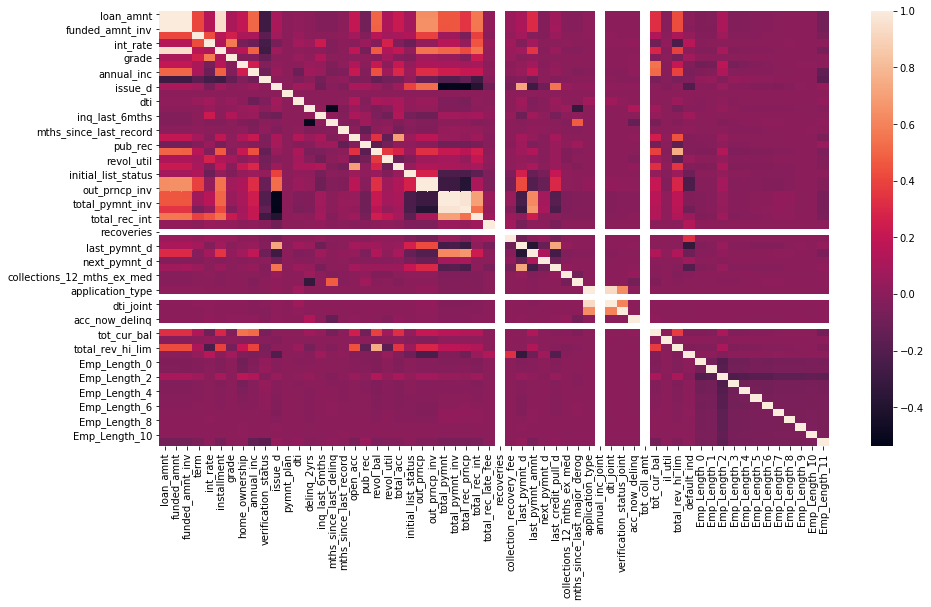

In [131]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr())

In [132]:
data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10,Emp_Length_11
loan_amnt,1.000000,0.999265,0.997601,0.411192,0.142966,0.949648,0.113410,0.196468,0.507935,-0.281637,...,0.111586,-0.027464,-0.021470,-0.015009,-0.013041,-0.005879,0.000239,0.005548,0.010097,-0.080955
funded_amnt,0.999265,1.000000,0.998485,0.410209,0.143116,0.950678,0.113336,0.196327,0.507690,-0.281071,...,0.111763,-0.027499,-0.021628,-0.015110,-0.013131,-0.005990,0.000322,0.005599,0.010168,-0.080781
funded_amnt_inv,0.997601,0.998485,1.000000,0.410575,0.143374,0.948854,0.112958,0.196305,0.506807,-0.281529,...,0.112406,-0.027741,-0.021841,-0.015282,-0.013166,-0.005952,0.000511,0.005753,0.010280,-0.080089
term,0.411192,0.410209,0.410575,1.000000,0.427411,0.158157,0.258175,0.110425,0.110238,-0.168264,...,0.069696,-0.017403,-0.015632,-0.010517,-0.006857,-0.003048,0.003409,0.005249,0.010379,-0.053176
int_rate,0.142966,0.143116,0.143374,0.427411,1.000000,0.129222,0.569403,-0.063466,-0.111897,-0.250940,...,0.002448,-0.004921,-0.005950,-0.001978,0.001211,0.007700,0.010896,0.000923,0.001972,0.002350
installment,0.949648,0.950678,0.948854,0.158157,0.129222,1.000000,0.108849,0.165652,0.489703,-0.275156,...,0.096456,-0.024251,-0.018141,-0.012345,-0.010632,-0.003559,0.001281,0.004898,0.008417,-0.072113
grade,0.113410,0.113336,0.112958,0.258175,0.569403,0.108849,1.000000,-0.022486,-0.030920,-0.132046,...,0.000413,-0.002551,-0.002674,0.001797,-0.000458,-0.000265,0.002499,-0.000411,0.000111,0.005119
home_ownership,0.196468,0.196327,0.196305,0.110425,-0.063466,0.165652,-0.022486,1.000000,0.249242,-0.030135,...,0.174192,-0.071150,-0.048920,-0.031439,-0.018917,-0.002655,0.005149,0.014639,0.015006,0.004391
annual_inc,0.507935,0.507690,0.506807,0.110238,-0.111897,0.489703,-0.030920,0.249242,1.000000,-0.095839,...,0.126936,-0.019235,-0.013915,-0.009222,-0.007610,-0.004591,-0.001535,0.005486,0.005882,-0.146858
verification_status,-0.281637,-0.281071,-0.281529,-0.168264,-0.250940,-0.275156,-0.132046,-0.030135,-0.095839,1.000000,...,-0.022901,0.035093,0.027051,0.018419,0.014966,0.010409,0.005449,0.005426,0.004710,-0.166164


In [133]:
data[['Emp_Length_0', 'default_ind']].corr()

,Emp_Length_0,default_ind
Emp_Length_0,1.000000,0.005209
default_ind,0.005209,1.000000


## Multi - collinearity

## Model Building

### Logistic Regression

In [134]:
log_reg_mod = LogisticRegression()

In [135]:
log_reg_mod.fit(train_X, train_y)

C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
pred_y = log_reg_mod.predict(test_X)

In [137]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.79      0.79      0.79       311

    accuracy                           1.00    256991
   macro avg       0.89      0.90      0.90    256991
weighted avg       1.00      1.00      1.00    256991



In [138]:
def plot_ConfusionMatrix_metrics(conf_mat, test_y, pred_y, figsize = None, class_names = None, hide_spines = False, 
                                 hide_ticks = False, title = ''): 
    '''
    conf_mat: Output of the confusion_matrix method
    test_y: The true values
    pred_y: The predicted values
    figsize: The size of confusion matrix that needs to be displayed
    class_names: Axes titles
    hide_splines: Option to remove splines. Default False
    hide_ticks: OPtion to hide ticks. Default False
    title: Title of the graph
    '''
    if figsize is None:
        figsize = (len(conf_mat)*5, len(conf_mat)*5)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    matshow = ax.matshow(conf_mat)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ''
            cell_text += format(conf_mat[i, j], '.0f')
            ax.text(x=j,
                        y=i,
                        s=cell_text,
                        va='center',
                        ha='center',
                        fontsize = 20,
                        color="white" if [i, j] != [0, 0]
                        else "black")

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
    ax.xaxis.set_ticks_position('top')
    
    ax.set_xticklabels(class_names, fontsize = 17)
    ax.set_yticklabels(class_names, fontsize = 17)
    ax.xaxis.set_label_coords(0.5, 1.15)
    
    plt.title(title, fontsize = 20, y = 1.2)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    
    ax.text(2.5, 0.2, 'Accuracy %:' + str(round(accuracy_score(test_y, pred_y) * 100, 2)), fontsize = 17)
    ax.text(1.8, 0.4, 'Precision %: ' + str(round(precision_score(test_y, pred_y) *100, 2)), fontsize = 17)
    ax.text(3.4, 0.4, 'Sensitivity: ' + str(round(conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0]), 2)), fontsize = 17)
    ax.text(1.8, 0.7, 'Specificity: ' + str(round(conf_mat[1][1] / (conf_mat[0][1] + conf_mat[1][1]), 2)), fontsize = 17)
    ax.text(3.4, 0.7, 'F1 Score: ' + str(round(f1_score(test_y, pred_y), 2)), fontsize = 17)
    ax.text(2.725, 0.55, 'AUC: ' + str(round(roc_auc_score(test_y, pred_y), 2)), fontsize = 17)
    
    plt.tight_layout()

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


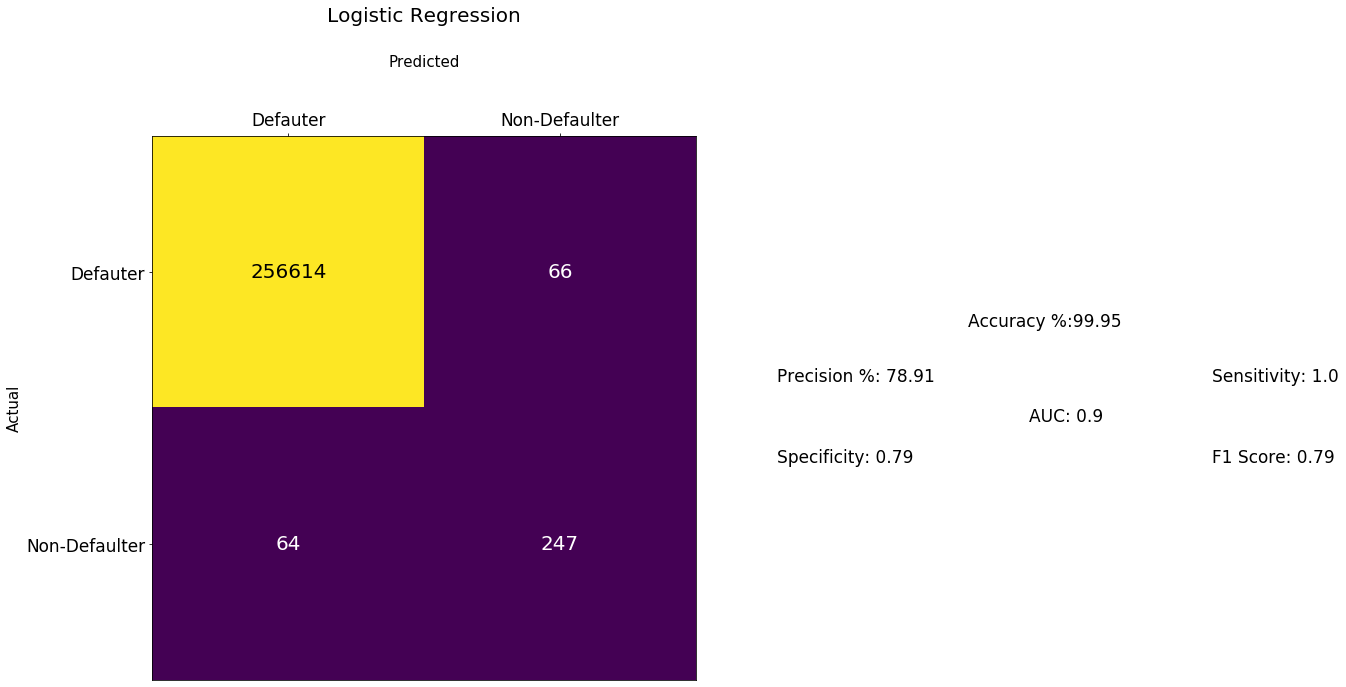

In [139]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Logistic Regression')

In [140]:
def roc_auc_plot(test_y, pred_y, title):
    '''
    test_y: The true values
    pred_y: The predicted values
    title: Title of the graph
    '''
    roc_auc = roc_auc_score(test_y, pred_y)
    fpr, tpr, thres = roc_curve(test_y, log_reg_mod.predict_proba(test_X)[:,1])

    # AUC AND FPR.TPR AND THRESHOLDS
    plt.figure()
    plt.plot(fpr,tpr,label='%s (Area = %0.2f)' % (title, roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Poitive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AND AUC for {title}')
    plt.legend(loc="lower right")

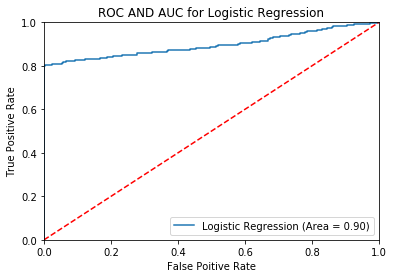

In [141]:
roc_auc_plot(test_y, pred_y, 'Logistic Regression')

In [142]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.79


### Decision Tree

#### Via GINI Index

Lower the better (less impure)

In [143]:
dec_tre_gini = DecisionTreeClassifier(criterion = 'gini')

In [144]:
dec_tre_gini.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [145]:
pred_y = dec_tre_gini.predict(test_X)

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


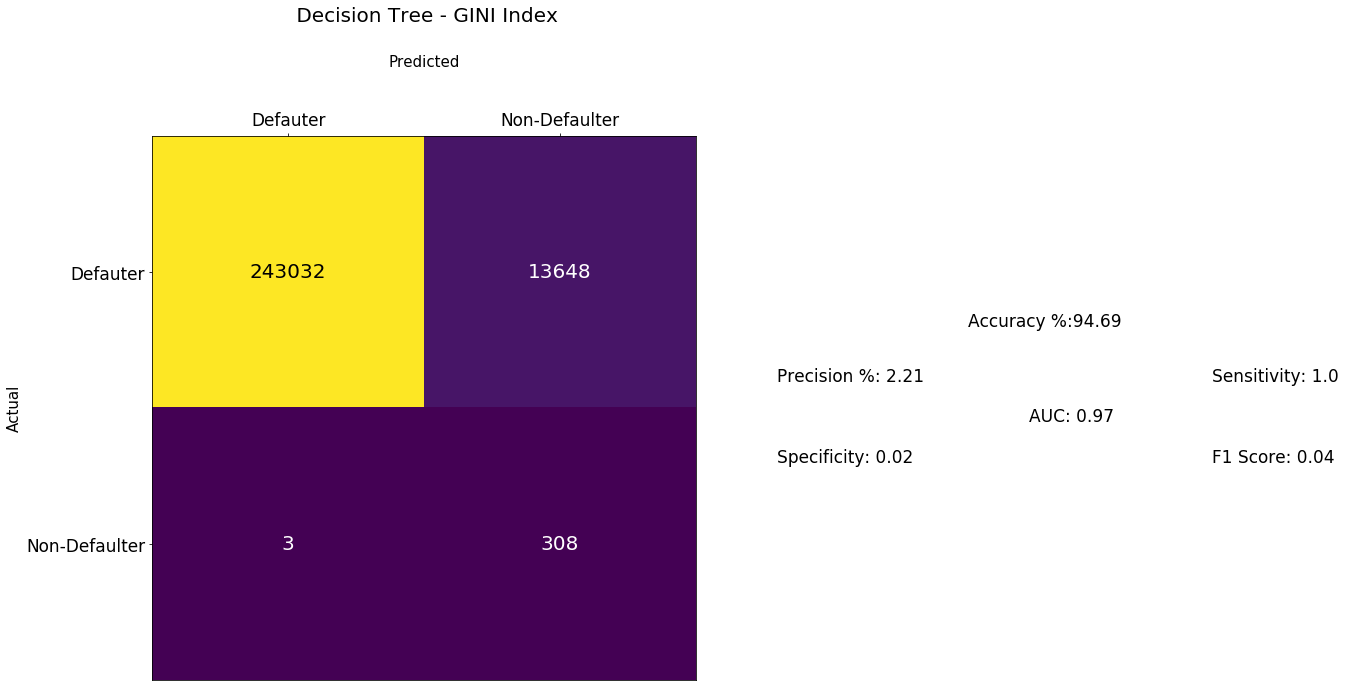

In [146]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = ' Decision Tree - GINI Index')

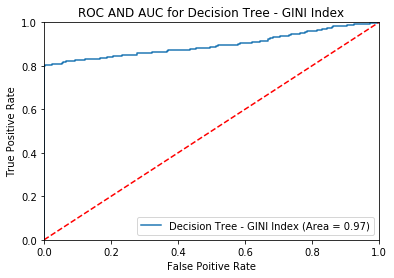

In [147]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - GINI Index')

In [148]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.99


#### Via Entropy

In [149]:
dec_tre_ent = DecisionTreeClassifier(criterion = 'entropy')

In [150]:
dec_tre_ent.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [151]:
pred_y = dec_tre_ent.predict(test_X)

In [152]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    256680
           1       0.02      1.00      0.04       311

    accuracy                           0.95    256991
   macro avg       0.51      0.97      0.51    256991
weighted avg       1.00      0.95      0.97    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


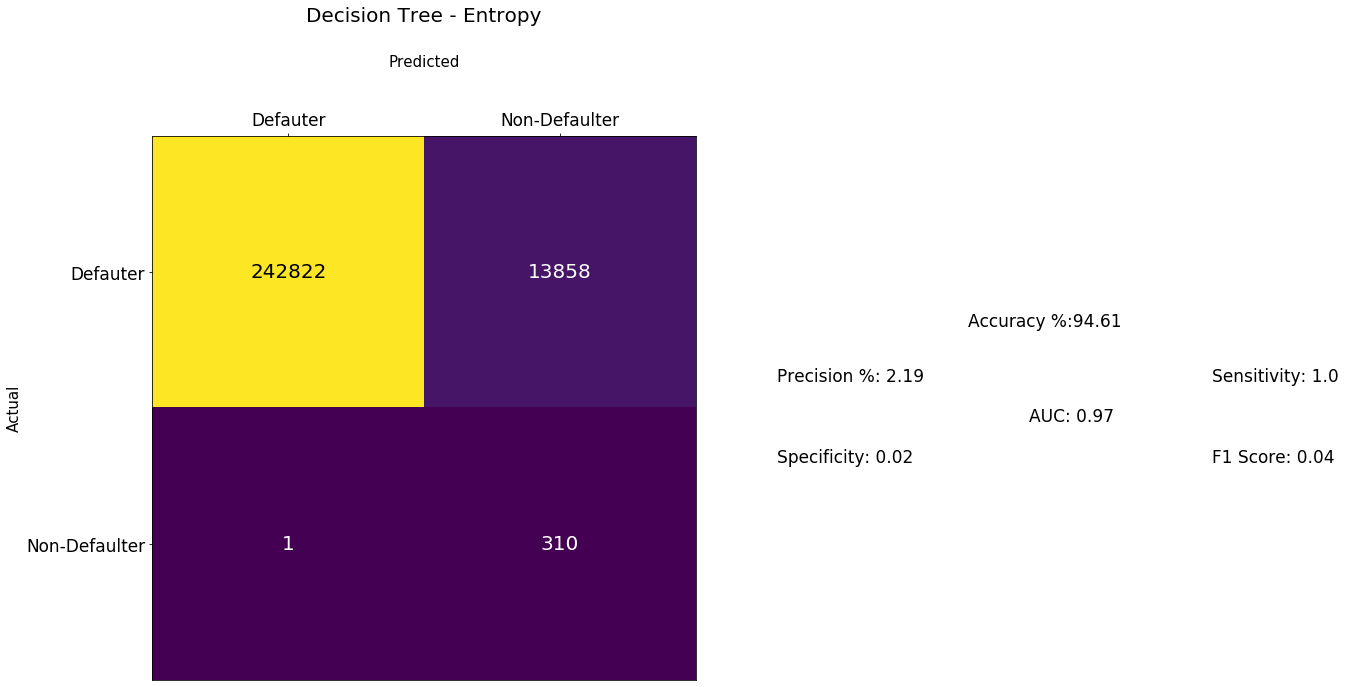

In [153]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Decision Tree - Entropy')

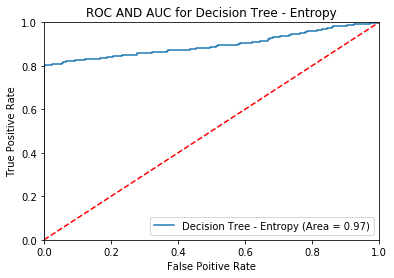

In [154]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - Entropy')

In [155]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 1.00


### Bagging - Boot-strap AGGregation

In [156]:
bag_mod = BaggingClassifier()

In [157]:
bag_mod.fit(train_X, train_y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [158]:
pred_y = bag_mod.predict(test_X)

In [159]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    256680
           1       0.02      1.00      0.04       311

    accuracy                           0.95    256991
   macro avg       0.51      0.97      0.51    256991
weighted avg       1.00      0.95      0.97    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


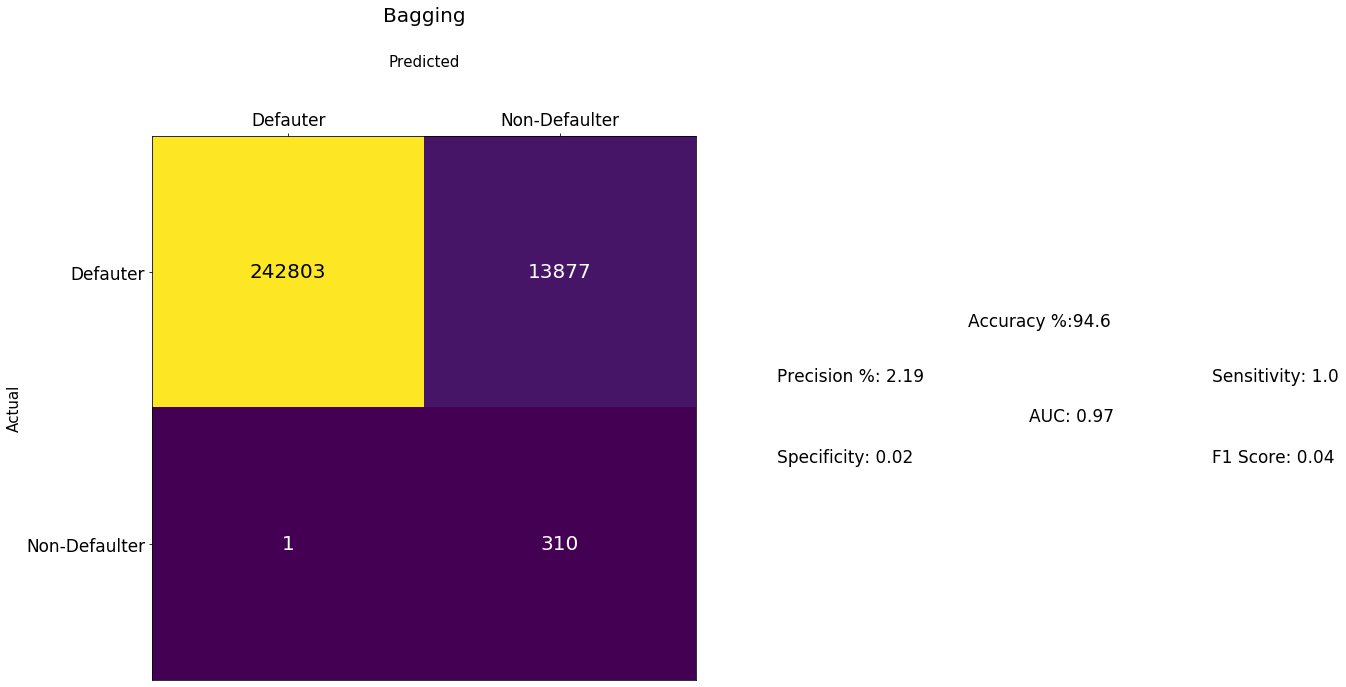

In [160]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Bagging')

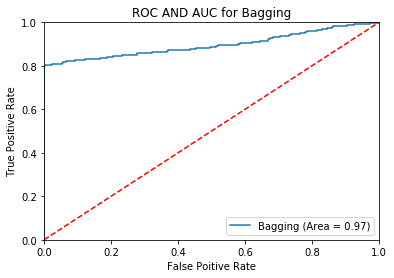

In [161]:
roc_auc_plot(test_y, pred_y, 'Bagging')

In [162]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 1.00


### KNN

In [163]:
knn_mod = KNeighborsClassifier()

In [164]:
knn_mod.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [165]:
pred_y = knn_mod.predict(test_X)

In [166]:
print(f'Accuracy %: {accuracy_score(test_y, pred_y) * 100}')

Accuracy %: 99.91011358374418


In [167]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.63      0.62      0.63       311

    accuracy                           1.00    256991
   macro avg       0.82      0.81      0.81    256991
weighted avg       1.00      1.00      1.00    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


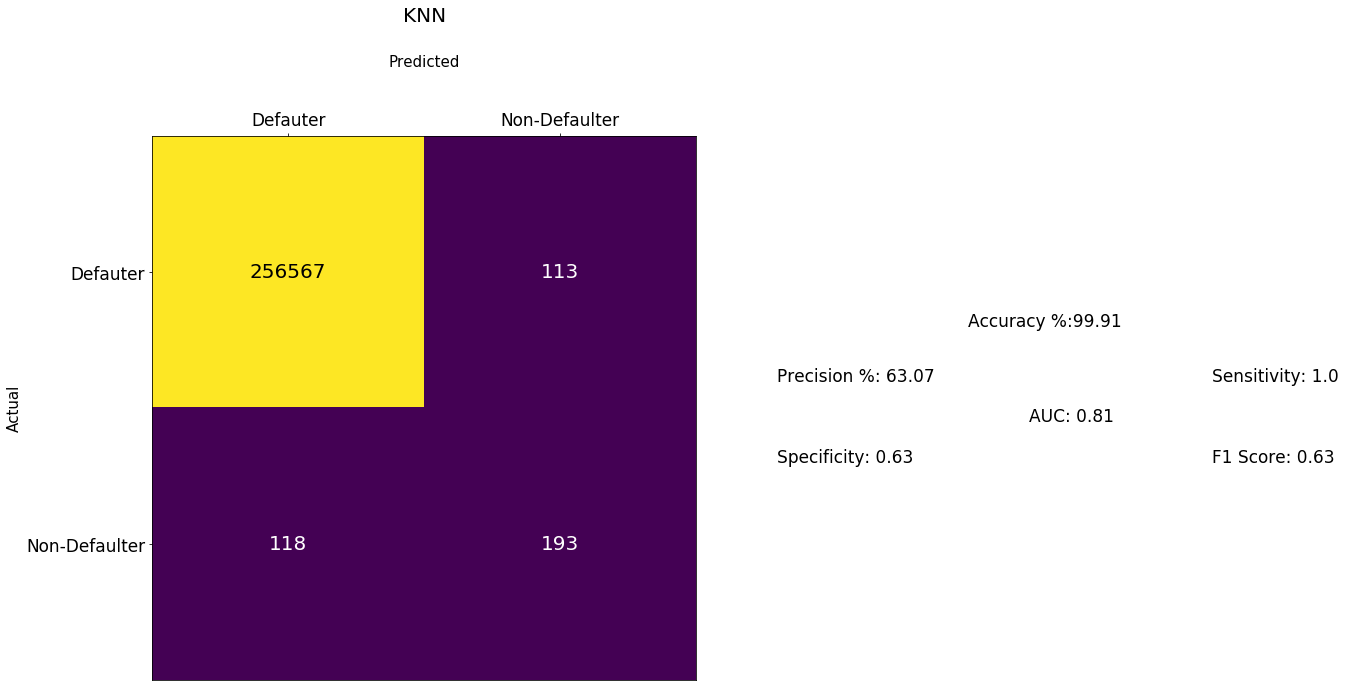

In [168]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'KNN')

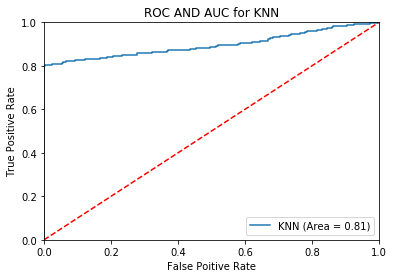

In [169]:
roc_auc_plot(test_y, pred_y, 'KNN')

In [170]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.62


### Random Forest

In [171]:
ran_for_mod = RandomForestClassifier()

In [172]:
ran_for_mod.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
pred_y = ran_for_mod.predict(test_X)

In [174]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.04      0.99      0.07       311

    accuracy                           0.97    256991
   macro avg       0.52      0.98      0.53    256991
weighted avg       1.00      0.97      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


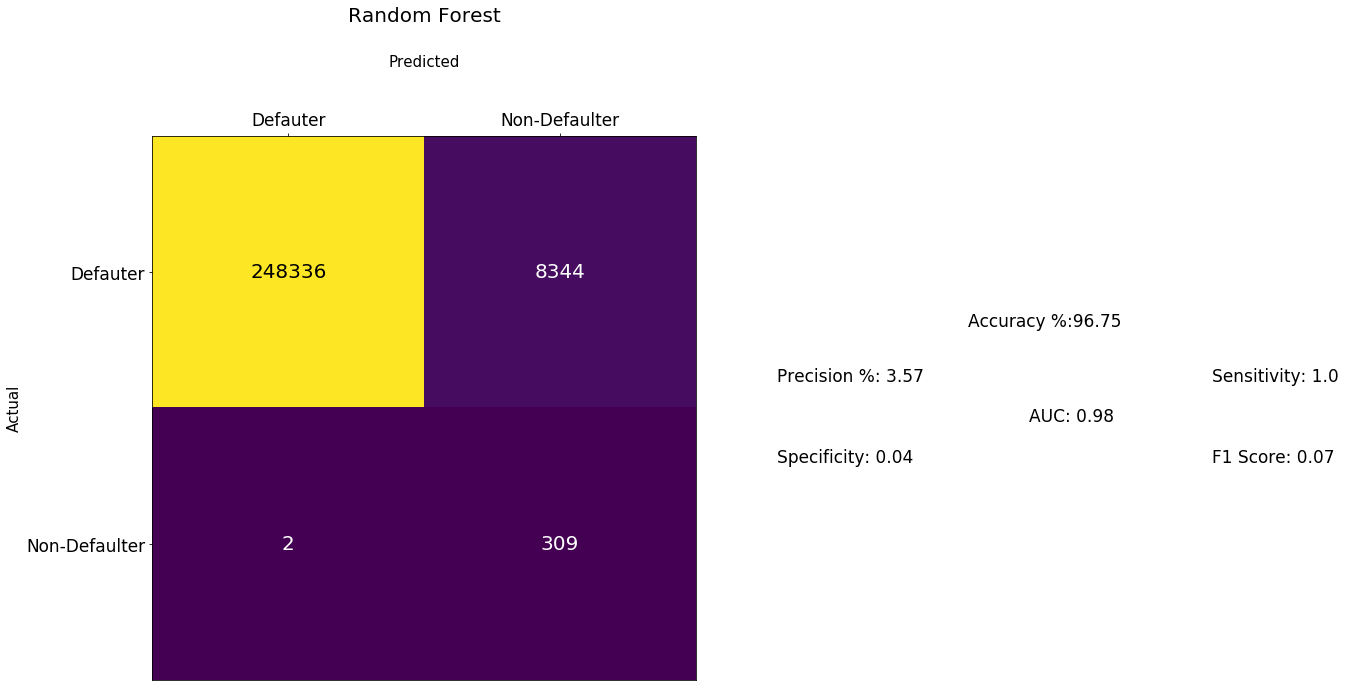

In [175]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Random Forest')

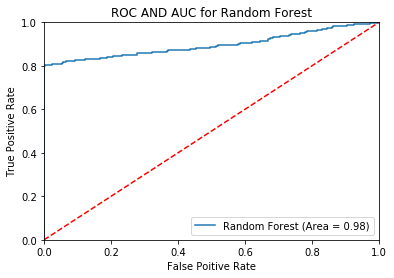

In [176]:
roc_auc_plot(test_y, pred_y, 'Random Forest')

In [177]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.99


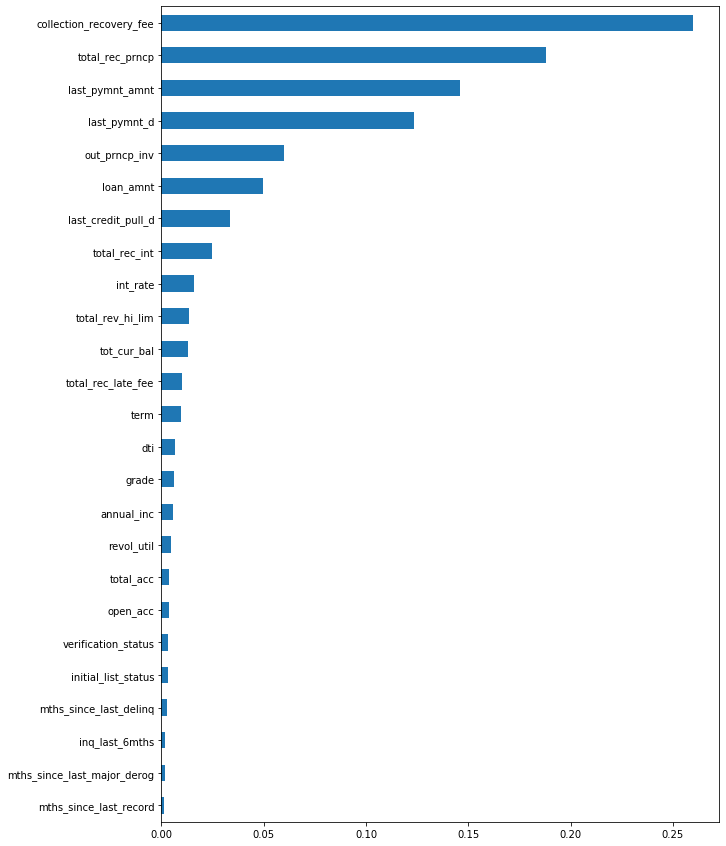

In [178]:
feat_importances = pd.Series(ran_for_mod.feature_importances_, index=train_X.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize = (10, 15)).invert_yaxis()

## Fine Tuning

Since the data is imbalanced, oversampling using SMOTE and then running the models

In [179]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y == 0))) 

sm = SMOTE(random_state=12, ratio = 1.0)
train_X_res, train_y_res = sm.fit_sample(train_X, train_y)

print('After OverSampling, the shape of train_X: {}'.format(train_X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(train_y_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(train_y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(train_y_res == 0))) 

Before OverSampling, counts of label '1': 46156
Before OverSampling, counts of label '0': 552822 



C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1105644, 51)
After OverSampling, the shape of train_y: (1105644,) 

After OverSampling, counts of label '1': 552822
After OverSampling, counts of label '0': 552822


## Model Building - Part 02

### Logistic Regression

In [180]:
log_reg_mod.fit(train_X_res, train_y_res)

C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
pred_y = log_reg_mod.predict(test_X)

In [182]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    256680
           1       0.08      0.80      0.14       311

    accuracy                           0.99    256991
   macro avg       0.54      0.90      0.57    256991
weighted avg       1.00      0.99      0.99    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


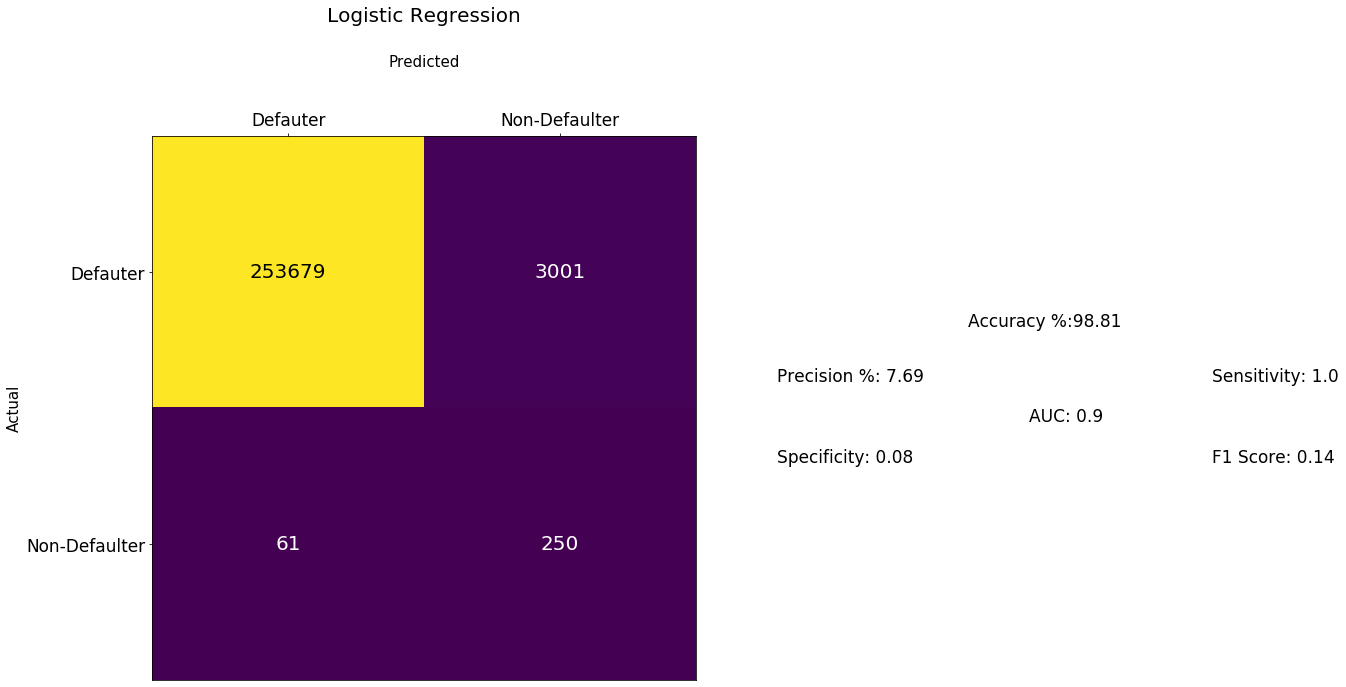

In [183]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Logistic Regression')

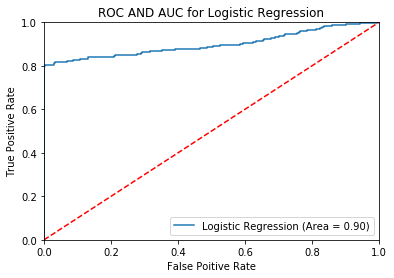

In [184]:
roc_auc_plot(test_y, pred_y, 'Logistic Regression')

In [185]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.80


### Decision Tree

#### Via GINI Index

Lower the better (less impure)

In [186]:
dec_tre_gini.fit(train_X_res, train_y_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
pred_y = dec_tre_gini.predict(test_X)

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


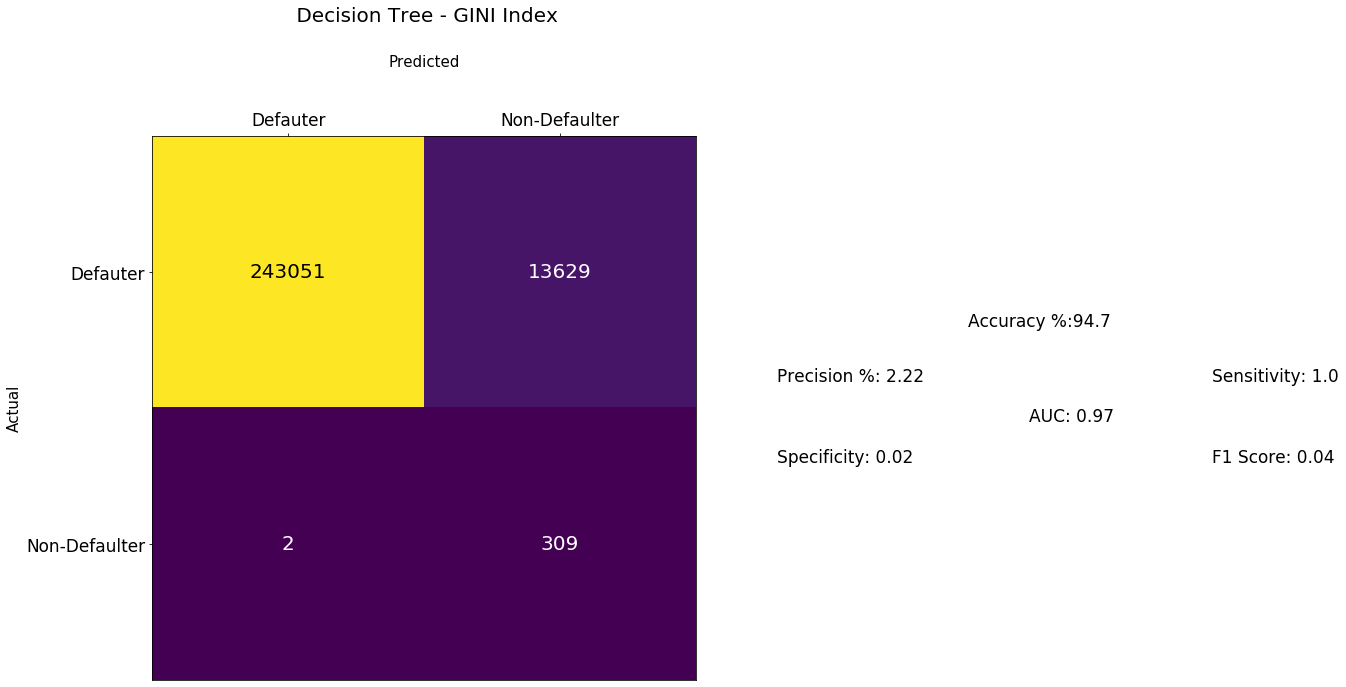

In [188]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = ' Decision Tree - GINI Index')

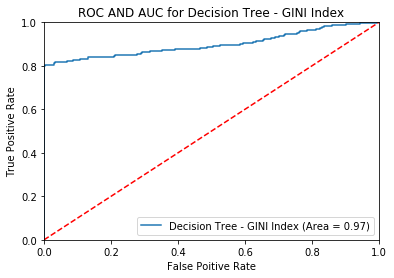

In [189]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - GINI Index')

In [190]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.99


#### Via Entropy

In [191]:
dec_tre_ent.fit(train_X_res, train_y_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [192]:
pred_y = dec_tre_ent.predict(test_X)

In [193]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    256680
           1       0.03      0.99      0.06       311

    accuracy                           0.96    256991
   macro avg       0.52      0.98      0.52    256991
weighted avg       1.00      0.96      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


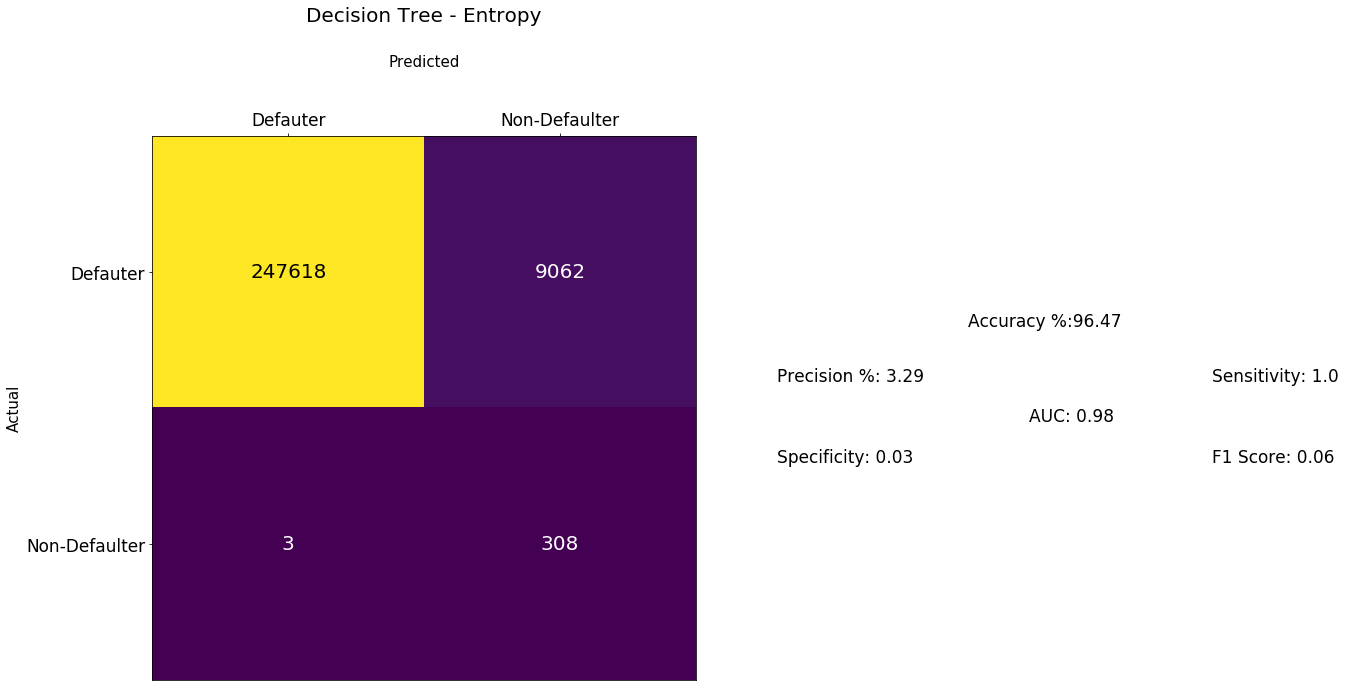

In [194]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Decision Tree - Entropy')

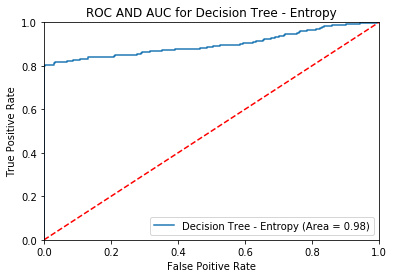

In [195]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - Entropy')

In [196]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.99


### Bagging - Boot-strap AGGregation

In [197]:
bag_mod = BaggingClassifier()

In [198]:
bag_mod.fit(train_X_res, train_y_res)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [199]:
pred_y = bag_mod.predict(test_X)

In [200]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    256680
           1       0.02      1.00      0.04       311

    accuracy                           0.95    256991
   macro avg       0.51      0.97      0.51    256991
weighted avg       1.00      0.95      0.97    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


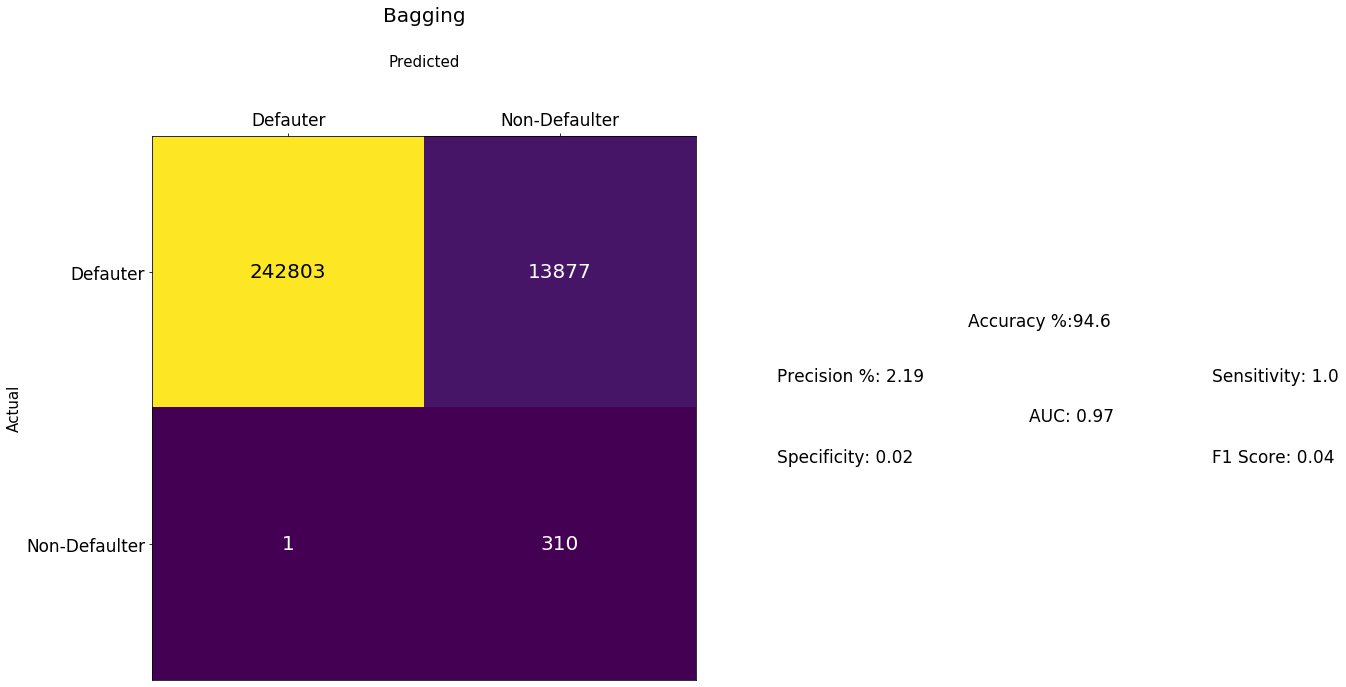

In [201]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Bagging')

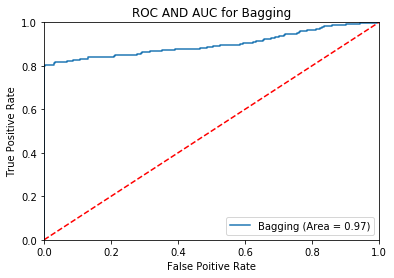

In [202]:
roc_auc_plot(test_y, pred_y, 'Bagging')

In [203]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 1.00


### KNN

In [204]:
knn_mod = KNeighborsClassifier()

In [205]:
knn_mod.fit(train_X_res, train_y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [206]:
pred_y = knn_mod.predict(test_X)

In [207]:
print(f'Accuracy %: {accuracy_score(test_y, pred_y) * 100}')

Accuracy %: 96.8944437742956


In [208]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.74      0.05       311

    accuracy                           0.97    256991
   macro avg       0.51      0.86      0.52    256991
weighted avg       1.00      0.97      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


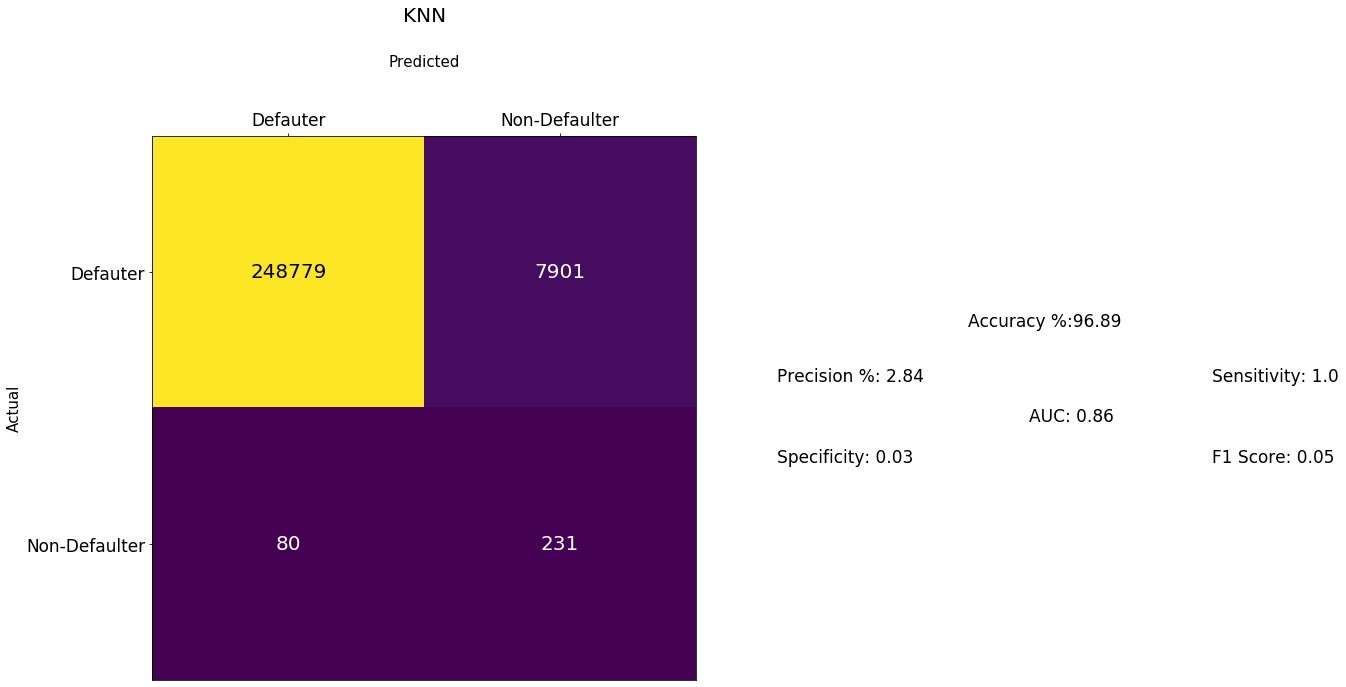

In [209]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'KNN')

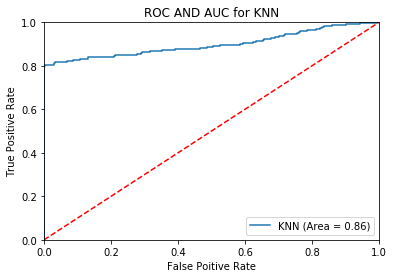

In [210]:
roc_auc_plot(test_y, pred_y, 'KNN')

In [211]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.74


### Random Forest

In [212]:
ran_for_mod = RandomForestClassifier()

In [213]:
ran_for_mod.fit(train_X_res, train_y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
pred_y = ran_for_mod.predict(test_X)

In [215]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.04      0.99      0.07       311

    accuracy                           0.97    256991
   macro avg       0.52      0.98      0.53    256991
weighted avg       1.00      0.97      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


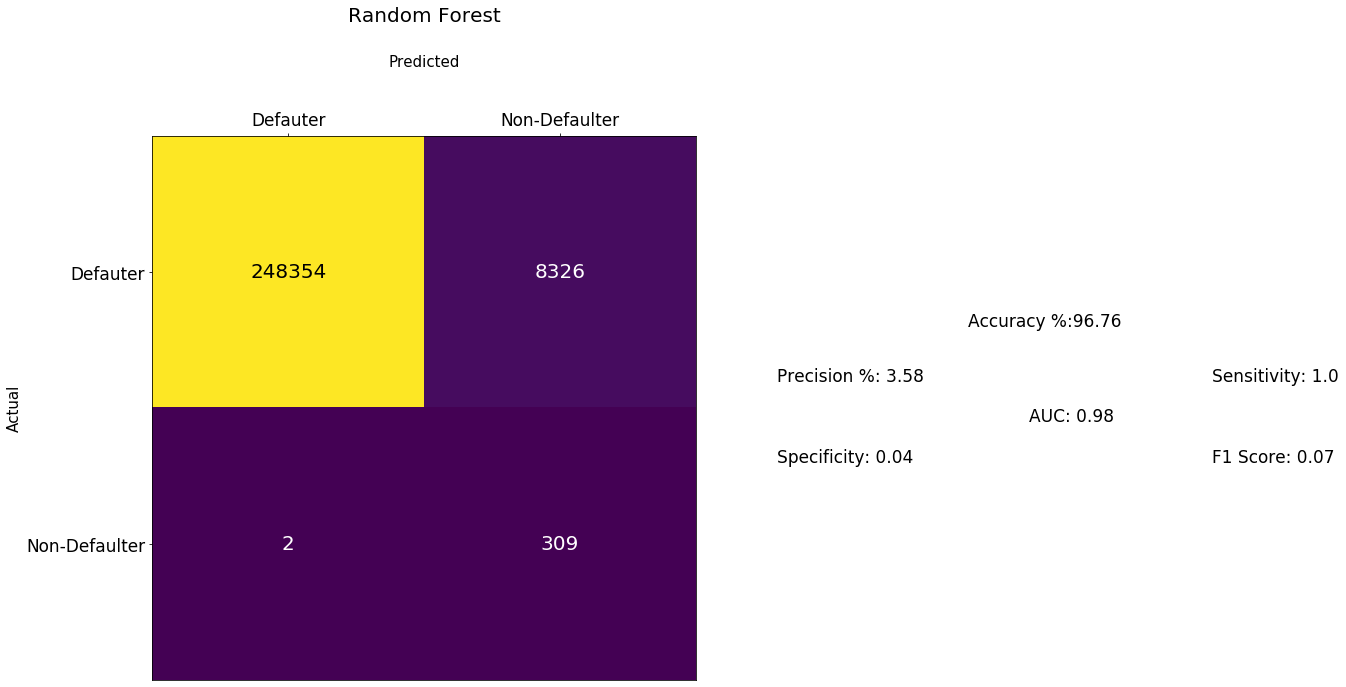

In [216]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Random Forest')

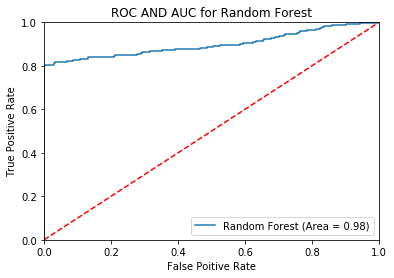

In [217]:
roc_auc_plot(test_y, pred_y, 'Random Forest')

In [218]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.99


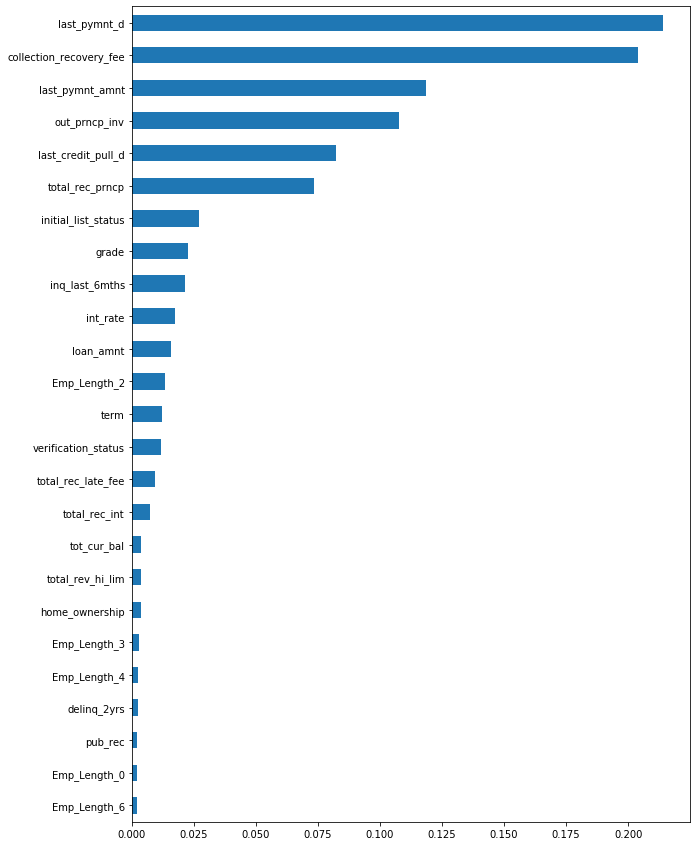

In [219]:
feat_importances = pd.Series(ran_for_mod.feature_importances_, index=train_X.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize = (10, 15)).invert_yaxis()

## As seen if the loan defaulter prediction are more important then Logistic is the better model, whereas for loan non-defaulter prediction Bagging proves as a better model

### Also, a point to be noted is that even though the SMOTE analysis has been performed, there wasn't a significant increase in the prediction accuracy of the model